# Top 100 Words Closest to "Queer" for Stein

In [7]:
import gensim
import gensim.models
from gensim.utils import simple_preprocess
from smart_open import smart_open
import os
from gensim import corpora
from pprint import pprint
from gensim.test.utils import datapath
from gensim import utils
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string

In [8]:
from random import choices
from scipy.spatial.distance import cosine
import numpy as np

In [53]:
file = open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\steincorpus.txt', 'r', encoding = 'latin-1')
data = file.read()
words = data.split()

print('Number of words in text file :', len(words))

Number of words in text file : 699562


In [74]:
# Save the model
#model.save("stein_word2vec.model")

In [6]:
# Load the model
#model = gensim.models.Word2Vec.load("stein_word2vec.model")

In [9]:
def paragraphize(linelist): 
    paragraphlist = []
    sentence = []
    scount = 0
    for line in linelist:
        words = line.strip().split()
        for w in words:
            if not w.endswith('.'):
                sentence.append(w)
            elif scount < 2:
                sentence.append(w)
                scount += 1
            else:
                scount = 0
                sentence.append(w)
                stext = ' '.join(sentence)
                sentence = []
                paragraphlist.append(stext)
    print(len(linelist), len(paragraphlist))
    
    return paragraphlist

In [10]:
with open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\steincorpus.txt', encoding = 'latin-1') as f:
    slines = f.readlines()

In [11]:
sparagraphs = paragraphize(slines)

21950 8958


In [12]:
for i in range(1):
    ssample = choices(sparagraphs, k = len(sparagraphs))
    class MyCorpus:
            def __iter__(self):
                global ssample    
                for line in ssample:
                    yield gensim.utils.simple_preprocess(line)

    sentences = MyCorpus()


In [13]:
%%time
model = gensim.models.Word2Vec(sentences, iter=100)

Wall time: 1min 48s


In [14]:
len(model.wv.vocab)

3543

In [15]:
vector = model.wv['queer']  # get numpy vector of a word
vector
sims = model.wv.most_similar('queer', topn=100)  # get other similar words
sims

[('different', 0.42251092195510864),
 ('funny', 0.380312442779541),
 ('peculiar', 0.36164483428001404),
 ('dreary', 0.3530161380767822),
 ('nice', 0.3371772766113281),
 ('splendid', 0.3367534279823303),
 ('covers', 0.32970383763313293),
 ('common', 0.3294132351875305),
 ('important', 0.3228115737438202),
 ('eating', 0.3091880679130554),
 ('stuff', 0.29409560561180115),
 ('personal', 0.2932763397693634),
 ('liking', 0.2895570993423462),
 ('facts', 0.2889300286769867),
 ('easy', 0.28817448019981384),
 ('hard', 0.28759220242500305),
 ('many', 0.2855204939842224),
 ('everyone', 0.28461480140686035),
 ('delicate', 0.2830182909965515),
 ('inside', 0.28055495023727417),
 ('injured', 0.279117226600647),
 ('uncertain', 0.27743107080459595),
 ('rigid', 0.27578452229499817),
 ('saddening', 0.27377986907958984),
 ('strongest', 0.27377039194107056),
 ('difficult', 0.27291572093963623),
 ('strange', 0.2716197967529297),
 ('brave', 0.2697541117668152),
 ('laughter', 0.26949506998062134),
 ('dreaming'

In [16]:
import pandas as pd
df = pd.DataFrame(sims) # make sims a dataframe
df_new = df.rename(columns={'words': '0', 'similarity score': '1'})

In [17]:
stein_queersimilar = df_new[0].tolist()
#Stein_queersimilar # get top 100 words as a list
stein_queersimilar.append('queer')
#add 'queer' to list

### Catagorizing Sentiments from a List of Top 100 Words Closest to Queer

In [18]:
with open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\liunegative.txt', encoding = 'utf-8') as f:
    negative_words = [x.strip() for x in f.readlines()]
    
with open('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\liupositive.txt', encoding = 'utf-8') as f:
    positive_words = [x.strip() for x in f.readlines()]

In [19]:
%matplotlib notebook
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cosine
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [20]:
#turn my list into a data frame where each row represents an embedding.

vectordict = dict()
for v in stein_queersimilar:
    vectordict[v] = model.wv[v]

In [21]:
vectordf = pd.DataFrame.from_dict(vectordict, orient = 'index')
vectordf.tail(100)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
funny,-0.327289,1.467872,-1.493799,-0.442533,1.834068,0.512159,3.279770,0.109055,-0.841947,2.488513,...,2.511725,0.798235,0.593931,-2.022056,-1.114937,0.679689,-0.697858,-1.053281,-0.973641,0.324261
peculiar,0.217317,-0.361816,-1.607849,-0.501313,1.026761,0.465279,1.171768,2.276660,-1.242437,1.940482,...,2.230602,-0.170468,1.884319,-0.873250,-1.493007,-0.090844,-0.434748,-1.340461,0.564088,0.718006
dreary,-0.118257,-0.681209,2.547849,1.010890,2.195939,1.754892,-2.062728,0.159074,-0.328469,0.738621,...,-1.055690,-2.021978,0.956327,-0.195760,-4.606680,-2.263996,4.547687,0.203381,1.914092,0.377525
nice,-0.990316,-2.557055,-0.189274,-0.530333,2.155462,-1.252232,1.417189,2.473439,-1.535534,1.224664,...,1.162258,0.308253,1.097469,-1.346704,3.078325,-0.049173,-1.159061,-0.908226,-0.453368,-0.291504
splendid,1.308217,-0.164909,-0.911096,-0.860386,0.260059,1.069690,0.010932,1.390565,-1.388437,2.417583,...,-0.169527,-0.655396,0.798205,2.256219,1.470963,-0.839937,1.022750,-1.800320,-0.782627,0.238947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
superstition,-0.030350,1.131336,-0.213035,-0.040365,-0.748832,-0.538142,-2.081276,1.828780,0.008723,0.809441,...,0.131165,-0.280892,0.447624,0.023982,-1.479822,0.667221,0.959186,1.053934,0.122217,-0.585679
generalised,1.698453,0.682718,-2.223332,0.291262,-0.765813,-1.293695,-5.762623,2.265226,0.497610,-3.201308,...,0.235651,-4.889607,4.004620,-0.539443,-2.329253,0.227207,2.066775,0.214121,2.475242,0.332469
wonderful,-0.383755,0.582815,2.187457,-2.535278,1.134792,2.924558,2.477753,1.633482,0.581929,0.430803,...,2.739804,-0.290275,-1.002892,-0.920648,3.528559,-3.831334,2.117302,0.758977,-3.257633,1.333536
frightening,-1.028754,0.492357,-1.856491,0.095436,0.222564,2.489637,0.922236,1.625536,0.355513,1.009876,...,-0.653698,0.485714,0.029200,-1.956885,-1.707190,-0.402127,-1.468443,-0.561770,0.389340,-0.932205


In [26]:
#use dimension-reduction techniques to flatten it into a plane
def vocab2pca(stein_queersimilar):
    
    vectordict = dict()
    for v in stein_queersimilar:
        vectordict[v] = model.wv[v]
        
    vectordf = pd.DataFrame.from_dict(vectordict, orient = 'index')
    
    vectorlengths = np.linalg.norm(vectordf, ord = 2, axis = 1)   # normalize vector lengths
    vectordf = vectordf.divide(vectorlengths, axis = 'rows')      # for PCA
    
    pca = PCA(n_components = 2)       
    components = pca.fit_transform(vectordf)                      # perform PCA
    plotframe = pd.DataFrame({'x': components[ : , 0], 'y': components[ : , 1]}, index = stein_queersimilar)
    
    return plotframe

In [27]:
plotframe = vocab2pca(stein_queersimilar)
plotframe

,x,y
different,-0.072730,0.192439
funny,-0.421532,0.080329
peculiar,-0.457998,0.041722
dreary,0.096031,-0.333124
nice,-0.458109,-0.090084
...,...,...
superstition,0.130521,-0.033241
generalised,0.293285,0.151620
wonderful,-0.260745,-0.286469
frightening,-0.363793,-0.033488


In [29]:
negativelist_stein = [w for w in stein_queersimilar if w in negative_words]
#negativelist_stein.remove('queer')
positivelist_stein = [w for w in stein_queersimilar if w in positive_words]
neutrallist_stein = [w for w in stein_queersimilar if w not in (negative_words + positive_words)]

In [30]:
plotframe_negative_stein = vocab2pca(negativelist_stein)
plotframe_positive_stein = vocab2pca(positivelist_stein)
plotframe_neutral_stein = vocab2pca(neutrallist_stein)
plotframe_negative_stein
plotframe_queer_stein = plotframe_negative_stein[(plotframe_negative_stein.index == 'queer')] #save 'queer' in separate dataframe
plotframe_negative_stein = plotframe_negative_stein.drop(['queer']) #drop 'queer' from plotframe_negative_stein
plotframe_negative_stein['sentiment']='negative' #add sentiment columns 
plotframe_positive_stein['sentiment']='positive'
plotframe_neutral_stein['sentiment']='neutral'
plotframe_queer_stein['sentiment']='queer'
plotframe_sentiment = pd.concat([plotframe_negative_stein,plotframe_positive_stein,plotframe_neutral_stein,plotframe_queer_stein]) #combine dataframes for plot
plotframe_sentiment

,x,y,sentiment
funny,-0.377073,-0.109621,negative
peculiar,-0.418131,0.199991,negative
dreary,0.168270,-0.140554,negative
hard,-0.306078,-0.096983,negative
uncertain,0.227070,-0.030483,negative
...,...,...,...
other,0.369065,0.049051,neutral
existing,0.333035,0.009324,neutral
instinct,0.057134,-0.059605,neutral
generalised,-0.086353,-0.248700,neutral


In [51]:
def plot_the_frame(plotframe_sentiment):    
    plt.figure(figsize = (20, 22))
    color_dict = dict({'positive':'green', 'neutral':'blue','negative':'red','queer':'purple'})
    theplot = sns.scatterplot(x = plotframe_sentiment.iloc[ : , 0], y = plotframe_sentiment.iloc[ : , 1], hue=plotframe_sentiment.iloc[ : , 2], palette=color_dict)
    collabels = plotframe_sentiment.columns.tolist()
    theplot.set(xlabel = collabels[0], ylabel = collabels[1])


    for rownum in range(plotframe_sentiment.shape[0]):
        x = plotframe_sentiment.iloc[rownum, 0]
        y = plotframe_sentiment.iloc[rownum, 1]
        theplot.text(x + 0.003, y + .003, 
        plotframe_sentiment.index[rownum], horizontalalignment='left', 
        size='small', color='black', fontsize=11, weight='semibold')

    plt.title('Sentiments of the Top 100 Words Closest to Queer (Stein)', fontsize=15)
    plt.savefig('queersentiment_stein_04282022.png')
    plt.show()

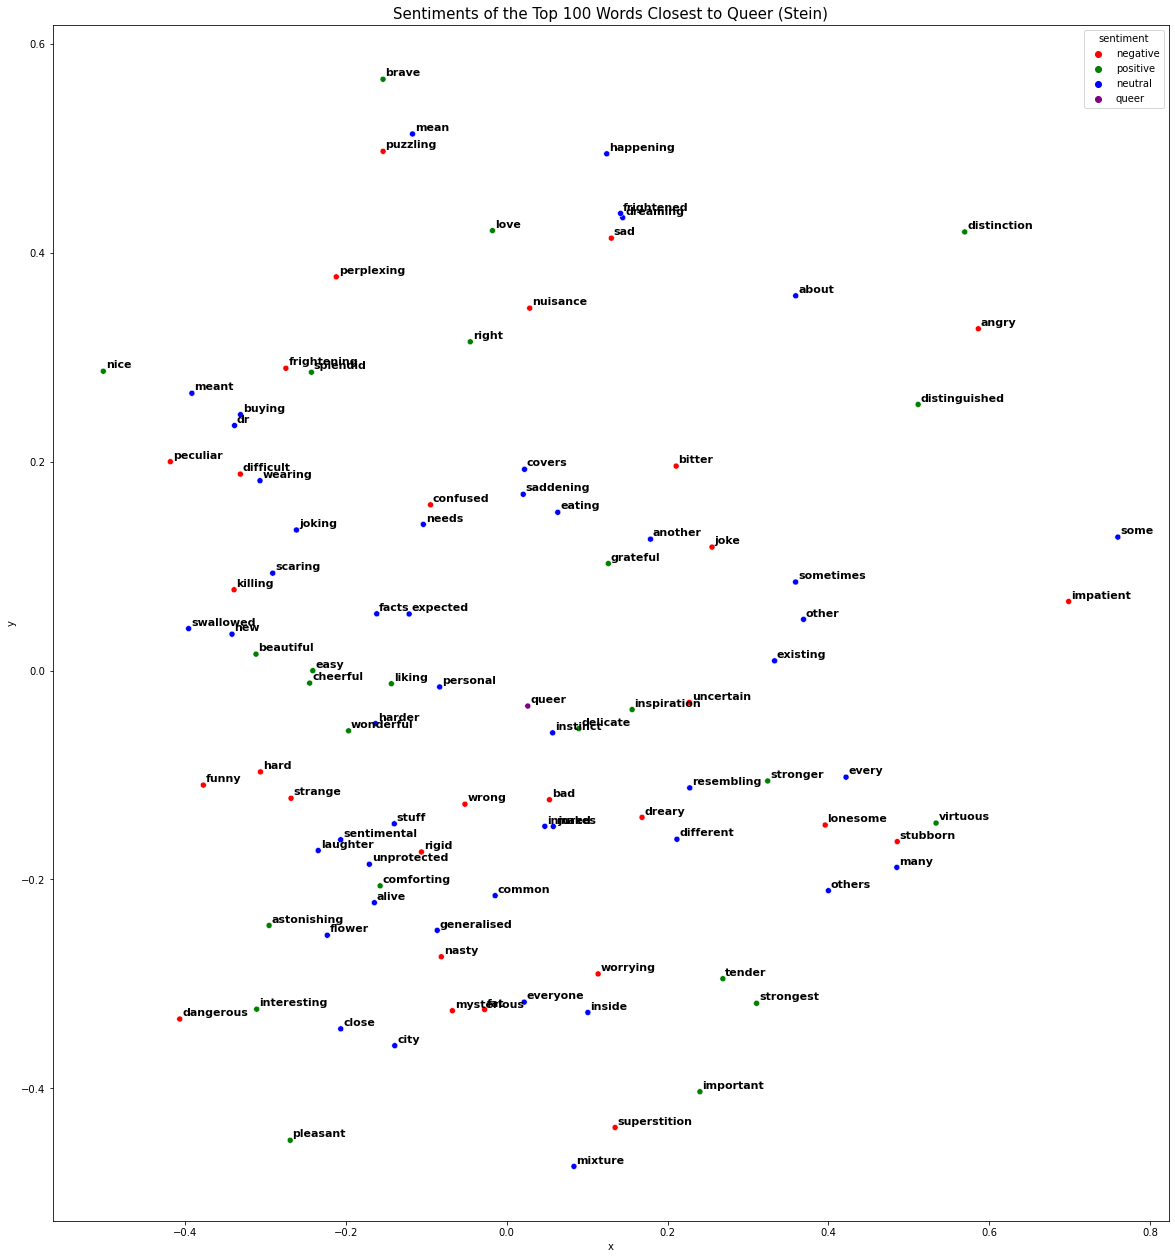

In [52]:
plot_the_frame(plotframe_sentiment)